<a href="https://colab.research.google.com/github/Syed-Irfan-1165/Online-Retail-Customer-Segmentation/blob/master/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name - Online-Retail-Customer-Segmentation**

Wavy_Tech-15_Single-04.jpg

**Project Type** - Machine Learning Classifictaion\
**Team:**
*  **Team Member 1** - Syed Khaja Irfanuddin
*  **Team Member 2** - Shivank Sharma

#Project Summary

**Customer segmentation** is a crucial aspect of marketing for online retailers. By dividing their customer base into smaller groups based on shared characteristics, retailers can gain a deeper understanding of their customers' needs and preferences, allowing them to tailor their marketing strategies and product offerings accordingly. The goal of customer segmentation is to improve customer engagement and satisfaction, increase sales and revenue, and gain a competitive advantage in the online retail market.

This project aims to segment the customers of an online retail store into meaningful groups based on their demographic, behavioral, and purchase history data. This information will be analyzed using machine learning algorithms and clustering techniques to provide insights into the purchasing behavior, needs, and preferences of different customer segments. The project will help the online retail store to better understand its customers and make data-driven decisions that will ultimately improve its business.

#Dataset description
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Feature	Description**

1. **InvoiceNo** : Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

2. **StockCode** : Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

3. **Description** : Product (item) name. Nominal.

4. **Quantity** : The quantities of each product (item) per transaction. Numeric.

5. **InvoiceDate** : Invoice Date and time. Numeric, the day and time when each transaction was generated.

6. **UnitPrice** : Unit price. Numeric, Product price per unit in sterling.

7. **CustomerID** : Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

8. **Country** : Country name. Nominal, the name of the country where each customer resides.


#Problem Statement

The problem statement for customer retail online segmentation is to segment the customers of an online retail store into meaningful groups based on their demographic, behavioral, and purchase history data. The goal is to gain a deeper understanding of the purchasing behavior, needs, and preferences of different customer segments, and to use this information to make data-driven decisions that will ultimately improve the business. By analyzing customer data using machine learning algorithms and clustering techniques, the project aims to provide insights into customer segments and their unique characteristics, allowing the retailer to tailor marketing strategies and product offerings to meet the needs of each segment. The ultimate objective is to improve customer engagement and satisfaction, increase sales and revenue, and gain a competitive advantage in the online retail market.

# **Git Hub Link :**

1. Syed Khaja Irfanuddin : https://github.com/Syed-Irfan-1165/Online-Retail-Customer-Segmentation.git

2. Shivank Sharma :  https://github.com/shivankb/online_retail_customer_segmentation.git



# **Know Your Data**

## Import Libraries and Dataset Loading

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px 

In [2]:
# Mounting the Drive

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Load Dataset

df = pd.read_csv(r"/content/drive/MyDrive/Online Retail Customer segmentation/Online Retail.xlsx - Online Retail.csv")

In [4]:
retail_df = df.copy(deep=True)

##Understanding the data

###Dataset first view

In [5]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

In [6]:
df.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

          InvoiceDate  UnitPrice  CustomerID Country  
541904  12/9/11 12:50       0.85     12680.0  France  
541905  12/9/11 12:50       2.10     12680.0  France  
541906  12/9/11 12:50       4.15     12680.0  France  
541907  12/9/11 12:50       4.15     12680.0  France  
541908  12/9/11 12:50       4.95     12680.0  France

### Dataset Rows & Columns count

In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
df.shape

(541909, 8)

### Dataset Information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Missing Values/Null Values

In [10]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [11]:
df.describe(include='all')

InvoiceNo StockCode                         Description       Quantity  \
count     541909    541909                              540455  541909.000000   
unique     25900      4070                                4223            NaN   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq        1114      2313                                2369            NaN   
mean         NaN       NaN                                 NaN       9.552250   
std          NaN       NaN                                 NaN     218.081158   
min          NaN       NaN                                 NaN  -80995.000000   
25%          NaN       NaN                                 NaN       1.000000   
50%          NaN       NaN                                 NaN       3.000000   
75%          NaN       NaN                                 NaN      10.000000   
max          NaN       NaN                                 NaN   80995.000000   

           InvoiceDate      UnitPrice     CustomerID         Country  
count           541909  541909.000000  406829.000000          541909  
unique           23260            NaN            NaN              38  
top     10/31/11 14:41            NaN            NaN  United Kingdom  
freq              1114            NaN            NaN          495478  
mean               NaN       4.611114   15287.690570             NaN  
std                NaN      96.759853    1713.600303             NaN  
min                NaN  -11062.060000   12346.000000             NaN  
25%                NaN       1.250000   13953.000000             NaN  
50%                NaN       2.080000   15152.000000             NaN  
75%                NaN       4.130000   16791.000000             NaN  
max                NaN   38970.000000   18287.000000             NaN

In [12]:
df.isnull()

InvoiceNo  StockCode  Description  Quantity  InvoiceDate  UnitPrice  \
0           False      False        False     False        False      False   
1           False      False        False     False        False      False   
2           False      False        False     False        False      False   
3           False      False        False     False        False      False   
4           False      False        False     False        False      False   
...           ...        ...          ...       ...          ...        ...   
541904      False      False        False     False        False      False   
541905      False      False        False     False        False      False   
541906      False      False        False     False        False      False   
541907      False      False        False     False        False      False   
541908      False      False        False     False        False      False   

        CustomerID  Country  
0            False    False  
1            False    False  
2            False    False  
3            False    False  
4            False    False  
...            ...      ...  
541904       False    False  
541905       False    False  
541906       False    False  
541907       False    False  
541908       False    False  

[541909 rows x 8 columns]

In [13]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [14]:
def show_missing(df):

  variable=[]
  d_type=[]
  missing=[]
  duplicate=[]
  unique=[]
  count=[]

  for item in df.columns:
    variable.append(item)
    d_type.append(df[item].dtype)
    missing.append(df[item].isna().sum())
    duplicate.append(df.duplicated().sum())
    unique.append(len(df[item].unique()))
    count.append(len(df[item]))

  output = pd.DataFrame({
        "variable":variable,
        "d_type":d_type,
        "missing":missing,
        "duplicate":duplicate,
        "unique":unique,
        "count":count,
    })
  return output

In [15]:
show_missing(df)

variable   d_type  missing  duplicate  unique   count
0    InvoiceNo   object        0       5268   25900  541909
1    StockCode   object        0       5268    4070  541909
2  Description   object     1454       5268    4224  541909
3     Quantity    int64        0       5268     722  541909
4  InvoiceDate   object        0       5268   23260  541909
5    UnitPrice  float64        0       5268    1630  541909
6   CustomerID  float64   135080       5268    4373  541909
7      Country   object        0       5268      38  541909

<AxesSubplot:>

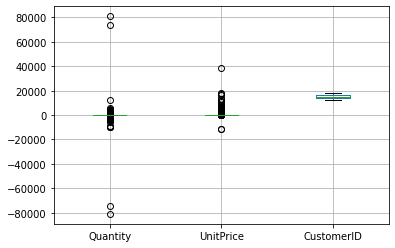

In [16]:
#Checking for Outliers
df.boxplot()

<AxesSubplot:>

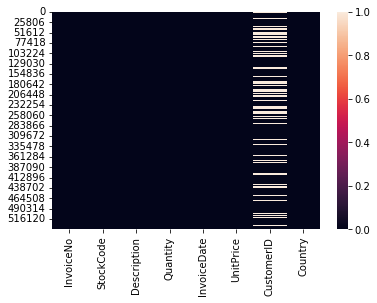

In [17]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull())

### What did you know about your dataset?



1. From the provided dataset, we were able to deduce that there are 8 total columns and 541909 rows, some of which have a different data type than what we need.
2. The dataset has to be cleansed because it contains numerous Missing/Null entries and duplicate values.
3. In order to acquire the result in a cleaner visualised form, outliers need to be removed.



# EDA

In [18]:
#dropping the duplicates

df.drop_duplicates(inplace=True)

In [19]:
#converting the datatypes
from datetime import datetime
df['InvoiceDate'] = df['InvoiceDate'].apply(lambda x: datetime.strptime(x,'%m/%d/%y %H:%M'))


In [20]:
df['UnitPrice'] = df['UnitPrice'].astype('int64')


In [21]:
df.describe()

Quantity      UnitPrice     CustomerID
count  536641.000000  536641.000000  401604.000000
mean        9.620029       4.075492   15281.160818
std       219.130156      97.233634    1714.006089
min    -80995.000000  -11062.000000   12346.000000
25%         1.000000       1.000000   13939.000000
50%         3.000000       2.000000   15145.000000
75%        10.000000       4.000000   16784.000000
max     80995.000000   38970.000000   18287.000000

* The first thing to note is that our dataset has some negative values. This can imply that these quantities were cancelled or returned. (Similar for negative UnitPrice values.)

### Working On Cancelled Invoice

* From the dataset description we were able to understand that there are some cancelled quantity to with letter 'C'. Let's see if our hypothesis is correct about the negative quantity: **-80995**.
We will look for the list of cancelled invoices and check if there is an invoice with that quantity.

In [22]:
cancelled_orders = df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00         27     14527.0  United Kingdom  
154 2010-12-01 09:49:00          4     15311.0  United Kingdom  
235 2010-12-01 10:24:00          1     17548.0  United Kingdom  
236 2010-12-01 10:24:00          0     17548.0  United Kingdom  
237 2010-12-01 10:24:00          0     17548.0  United Kingdom

In [23]:
cancelled_orders[cancelled_orders['Quantity']==-80995]

InvoiceNo StockCode                  Description  Quantity  \
540422   C581484     23843  PAPER CRAFT , LITTLE BIRDIE    -80995   

               InvoiceDate  UnitPrice  CustomerID         Country  
540422 2011-12-09 09:27:00          2     16446.0  United Kingdom

In [24]:
cancelled_orders[cancelled_orders['Quantity']>0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

As we expected the negative values in the columns are nothing but the cancelled or returned orders.

In [25]:
#check how many rows our dataframe of cancelled orders contain
print("We have ",len(cancelled_orders), " cancelled orders.")
#percentage of cancelled orders in total orders
total_orders = df['InvoiceNo'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

We have  9251  cancelled orders.
Percentage of orders canceled: 9251/25900 (35.72%) 


Answer: We have a large percentage of cancelled orders of 35%. Studying these cancelled orders may help in preventing future cancellation

Lets extract the most cancelled item


In [26]:
cancelled_orders

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00         27     14527.0  United Kingdom  
154    2010-12-01 09:49:00          4     15311.0  United Kingdom  
235    2010-12-01 10:24:00          1     17548.0  United Kingdom  
236    2010-12-01 10:24:00          0     17548.0  United Kingdom  
237    2010-12-01 10:24:00          0     17548.0  United Kingdom  
...                    ...        ...         ...             ...  
540449 2011-12-09 09:57:00          0     14397.0  United Kingdom  
541541 2011-12-09 10:28:00        224     15498.0  United Kingdom  
541715 2011-12-09 11:57:00         10     15311.0  United Kingdom  
541716 2011-12-09 11:58:00          1     17315.0  United Kingdom  
541717 2011-12-09 11:58:00          1     17315.0  United Kingdom  

[9251 rows x 8 columns]

In [27]:
cancelled_orders['Quantity'].min()

-80995

In [28]:
import plotly.express as px

fig = px.bar(cancelled_orders, x='Quantity', y='Country', color='Country', height=800, width=1200,
             title='Cancelled Orders by Country')
fig.update_layout(hovermode='closest')
fig.update_traces(hovertemplate='Country: %{y}<br>Quantity: %{x}')
fig.show()


In [29]:
fig2=px.scatter(cancelled_orders,x='Country',y='Quantity',color='Description',title='Most returned products by country',width=1000, height=600)
fig2.show()

As we can see from the above scatter plot the most returned item among the list is **Paper Craft,Little Birdie** which was returned in bulk amount i.e **80.995k** from the Country United Kingdom.

##Revenue per Country

In [30]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [31]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  Revenue  
0      2010-12-01 08:26:00          2     17850.0  United Kingdom       12  
1      2010-12-01 08:26:00          3     17850.0  United Kingdom       18  
2      2010-12-01 08:26:00          2     17850.0  United Kingdom       16  
3      2010-12-01 08:26:00          3     17850.0  United Kingdom       18  
4      2010-12-01 08:26:00          3     17850.0  United Kingdom       18  
...                    ...        ...         ...             ...      ...  
541904 2011-12-09 12:50:00          0     12680.0          France        0  
541905 2011-12-09 12:50:00          2     12680.0          France       12  
541906 2011-12-09 12:50:00          4     12680.0          France       16  
541907 2011-12-09 12:50:00          4     12680.0          France       16  
541908 2011-12-09 12:50:00          4     12680.0          France       12  

[536641 rows x 9 columns]

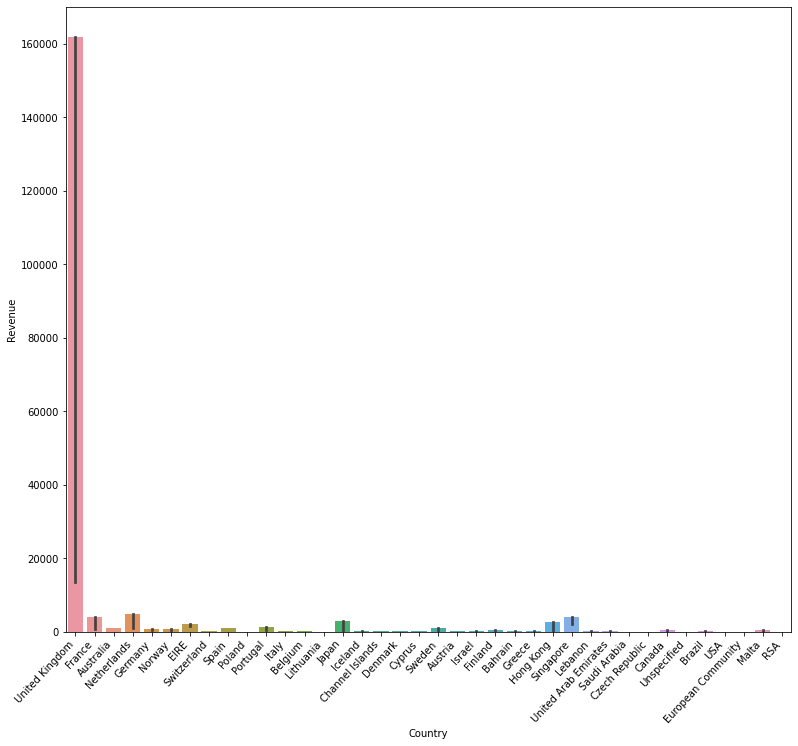

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='Revenue',data=df,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

In [33]:
# revenue generated by country
df.groupby('Country').sum().sort_values(by='Revenue', ascending=False)

Quantity  UnitPrice    CustomerID  Revenue
Country                                                         
United Kingdom         4250328    1960695  5.544907e+09  5952380
EIRE                    142495      43519  1.102464e+08   191032
Netherlands             200128       5307  3.419054e+07   188812
Germany                 117341      32297  1.198819e+08   159574
France                  110438      38168  1.074419e+08   136270
Australia                83643       3343  1.568057e+07    97025
Switzerland              30313       5637  2.377592e+07    40468
Spain                    26817      11126  3.262673e+07    40178
Belgium                  23152       6330  2.571829e+07    28096
Norway                   19247       5923  1.350765e+07    25839
Japan                    25218        630  4.567292e+06    22466
Portugal                 16153      12147  1.874993e+07    20697
Sweden                   35632       1565  6.777368e+06    17768
Finland                  10666       3401  8.699324e+06    17055
Denmark                   8188       1053  4.876734e+06    14630
Channel Islands           9473       3283  1.127029e+07    14437
Italy                     7999       3387  1.015666e+07    12243
Cyprus                    6296       3501  7.579696e+06     9560
Austria                   4827       1468  5.021102e+06     7624
Hong Kong                 4709      12053  0.000000e+00     7360
Singapore                 5234      24992  2.918376e+06     6425
Israel                    4350        899  3.126931e+06     5507
Poland                    3653       1225  4.341972e+06     5335
Greece                    1556        629  2.008584e+06     3862
Unspecified               3295        959  3.309817e+06     3143
Iceland                   2458        380  2.247154e+06     3012
Canada                    2763        822  2.615483e+06     2556
Malta                      944        598  2.158496e+06     2078
Lebanon                    386        212  5.743800e+05     1442
United Arab Emirates       982        191  1.018952e+06     1347
Lithuania                  652         79  5.366200e+05     1294
USA                       1034        497  3.672086e+06     1161
European Community         497        256  9.215880e+05     1003
Brazil                     356        124  4.086080e+05      934
RSA                        352        218  7.218680e+05      839
Bahrain                    260         74  2.100270e+05      448
Czech Republic             592         71  3.834300e+05      350
Saudi Arabia                75         17  1.256500e+05       84

Max Revenue generated is by the United Kingdom and the least generated Revenue is by Saudi Arabia

In [34]:
df[df['Country']=='United Kingdom']['CustomerID'].nunique()

3950

So, we can conclude not only most sales revenues are achieved in the UK, but also most customers are located there too. We can explore this to find more about what products the customers buy together and what possible future opportunities in the UK Market.

In [35]:
retail_uk = df[df['Country']=='United Kingdom']
retail_uk.describe()

Quantity      UnitPrice     CustomerID        Revenue
count  490300.000000  490300.000000  356728.000000  490300.000000
mean        8.668831       3.998970   15543.795284      12.140281
std       228.768014      99.838148    1594.286219     381.736219
min    -80995.000000  -11062.000000   12346.000000 -161990.000000
25%         1.000000       1.000000   14191.000000       1.000000
50%         3.000000       2.000000   15513.000000       5.000000
75%        10.000000       4.000000   16931.000000      12.000000
max     80995.000000   38970.000000   18287.000000  161990.000000

In [36]:
print("Number of transactions: ", retail_uk['InvoiceNo'].nunique())
print("Number of products bought: ",retail_uk['StockCode'].nunique())
print("Number of customers:", retail_uk['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(retail_uk['CustomerID'].isnull().sum() * 100 / len(retail_uk),2),"%" )


Number of transactions:  23494
Number of products bought:  4065
Number of customers: 3950
Percentage of customers NA:  27.24 %


In [37]:
retail_uk

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541889    581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT        12   
541890    581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
541891    581586     23275     SET OF 3 HANGING OWLS OLLIE BEAK        24   
541892    581586     21217        RED RETROSPOT ROUND CAKE TINS        24   
541893    581586     20685                DOORMAT RED RETROSPOT        10   

               InvoiceDate  UnitPrice  CustomerID         Country  Revenue  
0      2010-12-01 08:26:00          2     17850.0  United Kingdom       12  
1      2010-12-01 08:26:00          3     17850.0  United Kingdom       18  
2      2010-12-01 08:26:00          2     17850.0  United Kingdom       16  
3      2010-12-01 08:26:00          3     17850.0  United Kingdom       18  
4      2010-12-01 08:26:00          3     17850.0  United Kingdom       18  
...                    ...        ...         ...             ...      ...  
541889 2011-12-09 12:31:00          1     15804.0  United Kingdom       12  
541890 2011-12-09 12:49:00          2     13113.0  United Kingdom       16  
541891 2011-12-09 12:49:00          1     13113.0  United Kingdom       24  
541892 2011-12-09 12:49:00          8     13113.0  United Kingdom      192  
541893 2011-12-09 12:49:00          7     13113.0  United Kingdom       70  

[490300 rows x 9 columns]

##Explore quantity


###What are the products that are most bought in UK?

In [38]:
groupedProduct = retail_uk.groupby('Description',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
groupedProduct.head(10)

Description  Quantity
3988   WORLD WAR 2 GLIDERS ASSTD DESIGNS     48230
1858             JUMBO BAG RED RETROSPOT     43064
2725                      POPCORN HOLDER     34353
242        ASSORTED COLOUR BIRD ORNAMENT     33580
3898  WHITE HANGING HEART T-LIGHT HOLDER     33175
2350          PACK OF 12 LONDON TISSUES      25291
2384     PACK OF 72 RETROSPOT CAKE CASES     24679
3728     VICTORIAN GLASS HANGING T-LIGHT     23213
584                  BROCADE RING PURSE      22765
250            ASSORTED COLOURS SILK FAN     20322

In [39]:
import plotly.express as px

# group data by StockCode and Description and sum Quantity, then sort by Quantity in descending order
uk_product = df.groupby(['StockCode','Description'], as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)

# select the top 5 products
top_10_products = uk_product.head(10)

# create a dictionary to map each product to a color
color_product = dict(zip(top_10_products['Description'], px.colors.qualitative.T10))

# create the bar chart using Plotly Express
fig = px.bar(top_10_products, x='Quantity', y='Description', orientation='h', color='Description', color_discrete_map=color_product)
fig.update_layout(title='Top 10 Products in the UK', xaxis_title='Quantity', yaxis_title='Product Description')
fig.show()

In [40]:
invoice_quantity = retail_uk.groupby(['InvoiceNo', 'Description'], as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False).head(5)[['InvoiceNo', 'Description', 'Quantity']]

In [41]:
invoice_quantity.head(5)

InvoiceNo                        Description  Quantity
474311    581483        PAPER CRAFT , LITTLE BIRDIE     80995
55411     541431     MEDIUM CERAMIC TOP STORAGE JAR     74215
439748    578841     ASSTD DESIGN 3D PAPER STICKERS     12540
368769    573008  WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800
182438    554868               SMALL POPCORN HOLDER      4300

In [42]:
# Create the label for each segment
label = [f"{qty}<br>{desc}" for qty, desc in zip(invoice_quantity['Quantity'], invoice_quantity['Description'])]

# Create the sunburst chart
fig = px.sunburst(invoice_quantity, path=['InvoiceNo', 'Description'], values='Quantity',
                  color='Quantity', color_discrete_sequence=px.colors.qualitative.Dark24,
                  branchvalues='total', maxdepth=2,
                  hover_data={'InvoiceNo': False, 'Quantity': ':.2f'})

# Set the labels and layout
fig.update_layout(title='Top 5 Invoices by Total Quantity',
                  plot_bgcolor='white',
                  paper_bgcolor='white',
                  width=1000, height=700,
                  margin=dict(t=50, l=50, r=50, b=50),
                  legend=dict(x=0.8, y=0.1, orientation='h'))

# Set the label for each segment
fig.update_traces(text=label, textinfo='text', textfont_size=14)

# Show the chart
fig.show()


As we can see that Uk has the most customers as well as they generate the max revenue So we will be focusing on Uk data


## **Market Basket Analysis**

In [43]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [44]:
retail_df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

          InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/10 8:26       2.55     17850.0  United Kingdom  
1        12/1/10 8:26       3.39     17850.0  United Kingdom  
2        12/1/10 8:26       2.75     17850.0  United Kingdom  
3        12/1/10 8:26       3.39     17850.0  United Kingdom  
4        12/1/10 8:26       3.39     17850.0  United Kingdom  
...               ...        ...         ...             ...  
541904  12/9/11 12:50       0.85     12680.0          France  
541905  12/9/11 12:50       2.10     12680.0          France  
541906  12/9/11 12:50       4.15     12680.0          France  
541907  12/9/11 12:50       4.15     12680.0          France  
541908  12/9/11 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

In [45]:
retail_df = retail_df.drop_duplicates()

In [46]:
retail_df = retail_df.fillna(0)

In [47]:
# Remove leading and trailing whitespaces from 'Description' column
retail_df['Description'] = retail_df['Description'].str.strip()
# Drop rows where 'InvoiceNo' column is missing
retail_df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
# Convert 'InvoiceNo' column to string data type
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype('str')
# Remove rows with 'C' in 'InvoiceNo' column, which indicate cancelled transactions
retail_df = retail_df[~retail_df['InvoiceNo'].str.contains('C')]

In [48]:
# Define a function to encode quantity data as binary values
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

# Define a function to create a basket of items for a given country
def create_basket(country_filter):
    basket = (retail_df[retail_df['Country'] == country_filter]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
    return basket

In [49]:
# Set the country filter to 'France' and create a basket of items for that country
country_filter = "France"
basket_french = create_basket("France")

# Encode the basket data as binary values
basket_sets = basket_french.applymap(encode_units)

# Remove the 'POSTAGE' column from the basket data
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [50]:
# Find frequent itemsets with a minimum support of 0.05
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)

In [51]:
# Generate association rules with a minimum lift threshold of 1.2
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules = rules.drop(columns=['antecedent support', 'consequent support','leverage','conviction'])

In [52]:
# Display the first 5 rules
rules.head(5)

antecedents                   consequents   support  \
0  (ALARM CLOCK BAKELIKE GREEN)   (ALARM CLOCK BAKELIKE PINK)  0.073980   
1   (ALARM CLOCK BAKELIKE PINK)  (ALARM CLOCK BAKELIKE GREEN)  0.073980   
2    (ALARM CLOCK BAKELIKE RED)  (ALARM CLOCK BAKELIKE GREEN)  0.079082   
3  (ALARM CLOCK BAKELIKE GREEN)    (ALARM CLOCK BAKELIKE RED)  0.079082   
4    (ALARM CLOCK BAKELIKE RED)   (ALARM CLOCK BAKELIKE PINK)  0.073980   

   confidence      lift  
0    0.763158  7.478947  
1    0.725000  7.478947  
2    0.837838  8.642959  
3    0.815789  8.642959  
4    0.783784  7.681081

In [53]:
# Select the top 5 rules
top5_rules = rules.head(5)

In [54]:
import plotly.graph_objs as go
import json

# Convert frozenset objects to lists
antecedents = [list(x) for x in top5_rules['antecedents']]

# Define the data and layout for the alluvial plot
data = [
    go.Parcats(
        dimensions=[
            {'label': 'Antecedents', 'values': antecedents},
            {'label': 'Confidence', 'values': top5_rules['confidence'].tolist()},
            {'label': 'Lift', 'values': top5_rules['lift'].tolist()}
        ],
        hoverinfo='count',
        arrangement='freeform',
        line={'color': top5_rules['lift'].tolist(),
              'colorscale': 'Viridis'},
        labelfont={'size': 18},
        tickfont={'size': 16}
    )
]

layout = go.Layout(
    title='Top 5 Association Rules with Lift Threshold > 1.2',
    font=dict(size=18),
    width=1500,
    height=800,
    margin=dict(t=50, b=50, l=50, r=50),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

# Create the figure and show the plot
fig = go.Figure(data=data, layout=layout)
fig.show()


According to the results a customer is 7 times more likely to buy a pink alarm clock bakelike than an average customer (lift) if he/she buys ALARM CLOCK BAKELIKE GREEN. This rule is "true" in 72% of the cases (confidence). This can be used as insight to recommend ALARM CLOCK BAKELIKE PINK for those who bought the Green one.

In [55]:
basket_germany = create_basket("Germany")
basket2_sets = basket_germany.applymap(encode_units)
basket2_sets.drop('POSTAGE', inplace=True, axis=1)

In [56]:
frequent_itemsets_germany = apriori(basket2_sets, min_support=0.05, use_colnames=True)

In [57]:
rules_1 = association_rules(frequent_itemsets_germany, metric="lift", min_threshold=1.2)

In [58]:
rules_1 = rules_1.drop(columns=['antecedent support', 'consequent support','leverage','conviction'])

In [59]:
rules_1 = rules_1.drop_duplicates()

In [60]:
rules_1.head()

antecedents                           consequents  \
0   (PLASTERS IN TIN WOODLAND ANIMALS)       (PLASTERS IN TIN CIRCUS PARADE)   
1      (PLASTERS IN TIN CIRCUS PARADE)    (PLASTERS IN TIN WOODLAND ANIMALS)   
2  (ROUND SNACK BOXES SET OF 4 FRUITS)       (PLASTERS IN TIN CIRCUS PARADE)   
3      (PLASTERS IN TIN CIRCUS PARADE)   (ROUND SNACK BOXES SET OF 4 FRUITS)   
4      (PLASTERS IN TIN CIRCUS PARADE)  (ROUND SNACK BOXES SET OF4 WOODLAND)   

    support  confidence      lift  
0  0.067834    0.492063  4.242887  
1  0.067834    0.584906  4.242887  
2  0.050328    0.319444  2.754455  
3  0.050328    0.433962  2.754455  
4  0.056893    0.490566  2.001685

In [61]:
# Select the top 5 rules
top5_rules_1 = rules_1.head(5)

In [62]:
import plotly.graph_objs as go
import json

# Convert frozenset objects to lists
antecedents = [list(x) for x in top5_rules_1['antecedents']]

# Define the data and layout for the alluvial plot
data = [
    go.Parcats(
        dimensions=[
            {'label': 'Antecedents', 'values': antecedents},
            {'label': 'Confidence', 'values': top5_rules_1['confidence'].tolist()},
            {'label': 'Lift', 'values': top5_rules_1['lift'].tolist()}
        ],
        hoverinfo='count',
        arrangement='freeform',
        line={'color': top5_rules_1['lift'].tolist(),
              'colorscale': 'Viridis'},
        labelfont={'size': 18},
        tickfont={'size': 16}
    )
]

layout = go.Layout(
    title='Top 5 Association Rules with Lift Threshold > 1.2',
    font=dict(size=18),
    width=1500,
    height=800,
    margin=dict(t=50, b=50, l=50, r=50),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

# Create the figure and show the plot
fig = go.Figure(data=data, layout=layout)
fig.show()


According to the results a customer is 4 times more likely to buy PLASTERS IN TIN WOODLAND ANIMALS than an average customer (lift) if he/she buys PLASTERS IN TIN CIRCUS PARADE. This rule is "true" in 59% of the cases (confidence). This can be used as insight to recommend PLASTERS IN TIN WOODLAND ANIMALS for those who bought the Green one.

At this point, you may want to look at how much opportunity there is to use the popularity of one product to drive sales of another.

In [63]:
basket_uk = create_basket("United Kingdom")
basket3_sets = basket_uk.applymap(encode_units)
basket3_sets.drop('POSTAGE', inplace=True, axis=1)

In [64]:
frequent_itemsets_uk = apriori(basket3_sets, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets_uk, metric="lift", min_threshold=0.8)
rules = rules.drop(columns=['antecedent support', 'consequent support','leverage','conviction'])
rules.head()

Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []

As we didn't find any rules for United Kigdom customers. We will try other filters.

In [65]:
# Create a new DataFrame that includes only the rows where the Country is "United Kingdom"

retail_filtered = retail_df[retail_df['Country']=="United Kingdom"]

In [66]:
basket = (retail_filtered[retail_filtered['Quantity']<10]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [67]:
basket4_sets = basket.applymap(encode_units)
basket4_sets = basket.applymap(encode_units)
basket4_sets.drop('POSTAGE', inplace=True, axis=1)

In [68]:
frequent_itemsets_uk = apriori(basket3_sets, min_support=0.03, use_colnames=True)
rules_2 = association_rules(frequent_itemsets_uk, metric="lift", min_threshold=0.5)
rules_2 = rules_2.drop(columns=['antecedent support', 'consequent support','leverage','conviction'])
rules_2.head()

antecedents                        consequents  \
0         (ALARM CLOCK BAKELIKE RED)       (ALARM CLOCK BAKELIKE GREEN)   
1       (ALARM CLOCK BAKELIKE GREEN)         (ALARM CLOCK BAKELIKE RED)   
2   (PINK REGENCY TEACUP AND SAUCER)  (GREEN REGENCY TEACUP AND SAUCER)   
3  (GREEN REGENCY TEACUP AND SAUCER)   (PINK REGENCY TEACUP AND SAUCER)   
4  (ROSES REGENCY TEACUP AND SAUCER)  (GREEN REGENCY TEACUP AND SAUCER)   

    support  confidence       lift  
0  0.030159    0.605376  12.900874  
1  0.030159    0.642694  12.900874  
2  0.030909    0.820768  16.404818  
3  0.030909    0.617773  16.404818  
4  0.037551    0.732497  14.640537

In [69]:
# Select the top 5 rules
top5_rules_2 = rules_2.head(10)

In [70]:
import plotly.graph_objs as go
import json

# Convert frozenset objects to lists
antecedents = [list(x) for x in top5_rules_2['antecedents']]

# Define the data and layout for the alluvial plot
data = [
    go.Parcats(
        dimensions=[
            {'label': 'Antecedents', 'values': antecedents},
            {'label': 'Support', 'values': top5_rules_2['support'].tolist()},
            {'label': 'Lift', 'values': top5_rules_2['lift'].tolist()}
        ],
        hoverinfo='count',
        arrangement='freeform',
        line={'color': top5_rules_2['lift'].tolist(),
              'colorscale': 'Viridis'},
        labelfont={'size': 18},
        tickfont={'size': 16}
    )
]

layout = go.Layout(
    title='Top 5 Association Rules with Lift Threshold > 1.2',
    font=dict(size=18),
    width=1500,
    height=800,
    margin=dict(t=50, b=50, l=50, r=50),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

# Create the figure and show the plot
fig = go.Figure(data=data, layout=layout)
fig.show()


According to the results a customer is 13 times more likely to buy ALARM CLOCK BAKELIKE GREEN than an average customer (lift) if he/she buys ALARM CLOCK BAKELIKE RED. This rule is "true" in 61% of the cases (confidence). This can be used as insight to recommend ALARM CLOCK BAKELIKE GREEN for those who bought the RED one.

# **Data Preparation**

In [71]:
retail_uk.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Revenue  
0 2010-12-01 08:26:00          2     17850.0  United Kingdom       12  
1 2010-12-01 08:26:00          3     17850.0  United Kingdom       18  
2 2010-12-01 08:26:00          2     17850.0  United Kingdom       16  
3 2010-12-01 08:26:00          3     17850.0  United Kingdom       18  
4 2010-12-01 08:26:00          3     17850.0  United Kingdom       18

In [72]:
retail_uk.shape

(490300, 9)

In [73]:
retail_uk.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133572
Country             0
Revenue             0
dtype: int64

In [74]:
#Removing missing values from CustomerID column, can ignore missing values in description column
retail_uk = retail_uk[pd.notnull(retail_uk['CustomerID'])]

<AxesSubplot:>

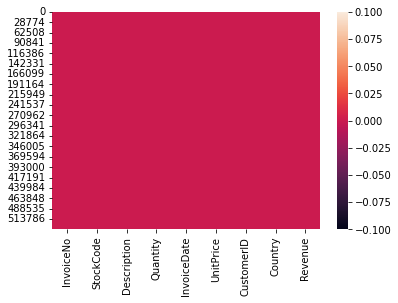

In [75]:
sns.heatmap(retail_uk.isnull())

In [76]:
#Verify is there any negative values in Quantity column
retail_uk.Quantity.min()

-80995

In [77]:
#Verify is there any negative values in Unit column
retail_uk.UnitPrice.min()

0

In [78]:
#Filter out records with negative values
retail_uk = retail_uk[(retail_uk['Quantity']>0)]

In [79]:
#Convert the string date filled to datetime
retail_uk['InvoiceDate'] = pd.to_datetime(retail_uk['InvoiceDate'])

<ipython-input-79-732a5c18139d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
retail_uk.shape

(349227, 9)

In [81]:
retail_uk.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Revenue  
0 2010-12-01 08:26:00          2     17850.0  United Kingdom       12  
1 2010-12-01 08:26:00          3     17850.0  United Kingdom       18  
2 2010-12-01 08:26:00          2     17850.0  United Kingdom       16  
3 2010-12-01 08:26:00          3     17850.0  United Kingdom       18  
4 2010-12-01 08:26:00          3     17850.0  United Kingdom       18

# RFM Model Analysis


### What is RFM?
* RFM is a process for assessing customer value. The letters RFM stand for Recency, Frequency, and Monetary.

*  RECENCY: How recently did the customer visit our website or make a purchase?

*  Frequency: How frequently do they visit or make purchases?

*  Monetary: How much money do they spend when they buy anything or how much money do we make from their visit?

### Why it's Required?
* RFM Analysis is a marketing framework used to comprehend and examine consumer behaviour based on the RECENCY, FREQUENCY, and FINANCIAL aspects mentioned above.

* The RFM Analysis will assist companies in dividing their consumer bases into a variety of homogeneous groups so that they may use various targeted marketing techniques to interact with each group.

In [82]:
retail_uk

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541889    581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT        12   
541890    581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
541891    581586     23275     SET OF 3 HANGING OWLS OLLIE BEAK        24   
541892    581586     21217        RED RETROSPOT ROUND CAKE TINS        24   
541893    581586     20685                DOORMAT RED RETROSPOT        10   

               InvoiceDate  UnitPrice  CustomerID         Country  Revenue  
0      2010-12-01 08:26:00          2     17850.0  United Kingdom       12  
1      2010-12-01 08:26:00          3     17850.0  United Kingdom       18  
2      2010-12-01 08:26:00          2     17850.0  United Kingdom       16  
3      2010-12-01 08:26:00          3     17850.0  United Kingdom       18  
4      2010-12-01 08:26:00          3     17850.0  United Kingdom       18  
...                    ...        ...         ...             ...      ...  
541889 2011-12-09 12:31:00          1     15804.0  United Kingdom       12  
541890 2011-12-09 12:49:00          2     13113.0  United Kingdom       16  
541891 2011-12-09 12:49:00          1     13113.0  United Kingdom       24  
541892 2011-12-09 12:49:00          8     13113.0  United Kingdom      192  
541893 2011-12-09 12:49:00          7     13113.0  United Kingdom       70  

[349227 rows x 9 columns]

In [83]:
#last date available in our dataset
retail_uk['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [84]:
import datetime as dt
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

In [85]:
#Create RFM Modelling scores for each customer
RFMScores = retail_uk.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Revenue': lambda x: x.sum()})

In [86]:
#Convert Invoice Date into type int
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

In [87]:
#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Revenue': 'Monetary'}, inplace=True)

In [88]:
RFMScores.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1     74215
1     12747.0        2        103      3388
2     12748.0        0       4413     21890
3     12749.0        3        199      3242
4     12820.0        3         59       576

In [89]:
#Descriptive Statistics (Recency)
RFMScores.Recency.describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

In [90]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Histogram(x=RFMScores['Recency'], nbinsx=20, name='Recency', marker_color='#17becf'))

# add hover information to the plot
fig.update_traces(hovertemplate='Count: %{y}')

# set the plot title and axis labels
fig.update_layout(title='Recency Distribution', xaxis_title='Recency', yaxis_title='Count', showlegend=True)

fig.show()


In [91]:
#Descriptive Statistics (Frequency)
RFMScores.Frequency.describe()

count    3921.000000
mean       89.065800
std       214.022733
min         1.000000
25%        17.000000
50%        40.000000
75%        98.000000
max      7676.000000
Name: Frequency, dtype: float64

In [92]:
x = RFMScores.query('Frequency < 1000')['Frequency']

fig = go.Figure(data=go.Histogram(x=x, nbinsx=20, name='Frequency', marker_color='maroon'))

# add hover information to the plot
fig.update_traces(hovertemplate='Count: %{y}')

# set the plot title and axis labels
fig.update_layout(title='Frequency Distribution (Frequency < 1000)', xaxis_title='Frequency', yaxis_title='Count', showlegend=True)

fig.show()


In [93]:
#Descriptive Statistics (Monetary)
RFMScores.Monetary.describe()

count      3921.000000
mean       1334.747768
std        6200.571137
min           0.000000
25%         191.000000
50%         436.000000
75%        1070.000000
max      223987.000000
Name: Monetary, dtype: float64

In [94]:
x = RFMScores.query('Monetary < 1000')['Monetary']

fig = go.Figure(data=go.Histogram(x=x, nbinsx=20, name='Monetary', marker_color='royalblue'))

# add hover information to the plot
fig.update_traces(hovertemplate='Count: %{y}')

# set the plot title and axis labels
fig.update_layout(title='Monetary Distribution (Monetary < 1000)', xaxis_title='Monetary', yaxis_title='Count', showlegend=True)

fig.show()

In [95]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [96]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 40.0, 0.75: 98.0},
 'Monetary': {0.25: 191.0, 0.5: 436.0, 0.75: 1070.0}}

In [97]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [98]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          1     74215  4  4  1
12747.0           2        103      3388  1  1  1
12748.0           0       4413     21890  1  1  1
12749.0           3        199      3242  1  1  1
12820.0           3         59       576  1  2  2

In [99]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                          
12346.0         325          1     74215  4  4  1      441         9
12747.0           2        103      3388  1  1  1      111         3
12748.0           0       4413     21890  1  1  1      111         3
12749.0           3        199      3242  1  1  1      111         3
12820.0           3         59       576  1  2  2      122         5

In [100]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['L1', 'L2', 'L3', 'L4']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

CustomerID  Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
0     12346.0      325          1     74215  4  4  1      441         9   
1     12747.0        2        103      3388  1  1  1      111         3   
2     12748.0        0       4413     21890  1  1  1      111         3   
3     12749.0        3        199      3242  1  1  1      111         3   
4     12820.0        3         59       576  1  2  2      122         5   

  RFM_Loyalty_Level  
0                L3  
1                L1  
2                L1  
3                L1  
4                L1

In [101]:
#Validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

CustomerID  Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
0     18102.0        0        431    223987  1  1  1      111         3   
1     17450.0        8        336    168171  1  1  1      111         3   
2     17511.0        2        963     59321  1  1  1      111         3   
3     14096.0        4       5111     56688  1  1  1      111         3   
4     16684.0        4        277     44357  1  1  1      111         3   
5     14088.0       10        589     44172  1  1  1      111         3   
6     15311.0        0       2366     41924  1  1  1      111         3   
7     13089.0        2       1814     41608  1  1  1      111         3   
8     15061.0        3        403     39994  1  1  1      111         3   
9     13694.0        3        568     36267  1  1  1      111         3   

  RFM_Loyalty_Level  
0                L1  
1                L1  
2                L1  
3                L1  
4                L1  
5                L1  
6                L1  
7                L1  
8                L1  
9                L1

In [102]:
import plotly.graph_objs as go

# create 3D scatter plot trace with hovering text
trace = go.Scatter3d(
    x=RFMScores.Recency,
    y=RFMScores.Frequency,
    z=RFMScores.Monetary,
    mode='markers',
    marker=dict(
        size=5,
        color=RFMScores.Monetary,
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(
            title='Monetary Value',
        ),
    ),
    text=["Recency: {}<br>Frequency: {}<br>Monetary: {}".format(r, f, m)
          for r, f, m in zip(RFMScores.Recency, RFMScores.Frequency, RFMScores.Monetary)],
    hovertemplate='%{text}',
)

# create layout with axis labels and legend
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Recency'),
        yaxis=dict(title='Frequency'),
        zaxis=dict(title='Monetary Value'),
    ),
    showlegend=True,
)

# create figure with trace and layout
fig = go.Figure(data=[trace], layout=layout)

# show the plot
fig.show()


In [103]:
import plotly.offline as po
import plotly.graph_objs as gobj

#Recency Vs Frequency
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [    gobj.Scatter3d(        x=graph.query("RFM_Loyalty_Level == 'L4'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'L4'")['Frequency'],
        z=graph.query("RFM_Loyalty_Level == 'L4'")['Monetary'],
        mode='markers',
        name='L4',
        marker=dict(
            size=7,
            line=dict(width=1),
            color='blue',
            opacity=0.8
        )
    ),
    gobj.Scatter3d(
        x=graph.query("RFM_Loyalty_Level == 'L3'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'L3'")['Frequency'],
        z=graph.query("RFM_Loyalty_Level == 'L3'")['Monetary'],
        mode='markers',
        name='L3',
        marker=dict(
            size=9,
            line=dict(width=1),
            color='green',
            opacity=0.5
        )
    ),
    gobj.Scatter3d(
        x=graph.query("RFM_Loyalty_Level == 'L2'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'L2'")['Frequency'],
        z=graph.query("RFM_Loyalty_Level == 'L2'")['Monetary'],
        mode='markers',
        name='L2',
        marker=dict(
            size=11,
            line=dict(width=1),
            color='red',
            opacity=0.9
        )
    ),
    gobj.Scatter3d(
        x=graph.query("RFM_Loyalty_Level == 'L1'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'L1'")['Frequency'],
        z=graph.query("RFM_Loyalty_Level == 'L1'")['Monetary'],
        mode='markers',
        name='L1',
        marker=dict(
            size=13,
            line=dict(width=1),
            color='black',
            opacity=0.9
        )
    )
]

plot_layout = gobj.Layout(
    scene=dict(
        xaxis_title='Recency',
        yaxis_title='Frequency',
        zaxis_title='Monetary'
    ),
    title='Recency Vs Frequency'
)

fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)


In [104]:
#Frequency Vs Monetary
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [    gobj.Scatter3d(        x=graph.query("RFM_Loyalty_Level == 'L4'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'L4'")['Monetary'],
        z=graph.query("RFM_Loyalty_Level == 'L4'")['Recency'],
        mode='markers',
        name='L4',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
    gobj.Scatter3d(
        x=graph.query("RFM_Loyalty_Level == 'L3'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'L3'")['Monetary'],
        z=graph.query("RFM_Loyalty_Level == 'L3'")['Recency'],
        mode='markers',
        name='L3',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
    gobj.Scatter3d(
        x=graph.query("RFM_Loyalty_Level == 'L2'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'L2'")['Monetary'],
        z=graph.query("RFM_Loyalty_Level == 'L2'")['Recency'],
        mode='markers',
        name='L2',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter3d(
        x=graph.query("RFM_Loyalty_Level == 'L1'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'L1'")['Monetary'],
        z=graph.query("RFM_Loyalty_Level == 'L1'")['Recency'],
        mode='markers',
        name='L1',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
    scene=dict(
        xaxis=dict(title='Frequency'),
        yaxis=dict(title='Monetary'),
        zaxis=dict(title='Recency')
    ),
    title='Frequency Vs Monetary'
)

fig = gobj.Figure(data=plot_data, layout=plot_layout)

po.iplot(fig)


In [105]:
#Recency Vs Monetary
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter3d(
        x=graph.query("RFM_Loyalty_Level == 'L4'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'L4'")['Monetary'],
        z=graph.query("RFM_Loyalty_Level == 'L4'")['Frequency'],
        mode='markers',
        name='L4',
        marker=dict(
            size=7,
            line=dict(width=1),
            color='blue',
            opacity=0.8
        )
    ),
    gobj.Scatter3d(
        x=graph.query("RFM_Loyalty_Level == 'L3'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'L3'")['Monetary'],
        z=graph.query("RFM_Loyalty_Level == 'L3'")['Frequency'],
        mode='markers',
        name='L3',
        marker=dict(
            size=9,
            line=dict(width=1),
            color='green',
            opacity=0.5
        )
    ),
    gobj.Scatter3d(
        x=graph.query("RFM_Loyalty_Level == 'L2'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'L2'")['Monetary'],
        z=graph.query("RFM_Loyalty_Level == 'L2'")['Frequency'],
        mode='markers',
        name='L2',
        marker=dict(
            size=11,
            line=dict(width=1),
            color='red',
            opacity=0.9
        )
    ),
    gobj.Scatter3d(
        x=graph.query("RFM_Loyalty_Level == 'L1'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'L1'")['Monetary'],
        z=graph.query("RFM_Loyalty_Level == 'L1'")['Frequency'],
        mode='markers',
        name='L1',
        marker=dict(
            size=13,
            line=dict(width=1),
            color='black',
            opacity=0.9
        )
    ),
]

plot_layout = gobj.Layout(
    scene=dict(
        xaxis_title='Recency',
        yaxis_title='Monetary',
        zaxis_title='Frequency'
    ),
    title='Recency Vs Monetary'
)

fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)


## Normalization and Scaling the data

In [106]:
num_cols = ['Recency','Frequency','Monetary']

In [107]:
import plotly.subplots as sp

#Number of columns and rows to subplot
n_rows = 7
n_plots = n_rows * len(num_cols)

# creating a subplot for each numerical column
for i, col in enumerate(num_cols):
    if i >= n_plots:
        break
    fig = sp.make_subplots(rows=1, cols=1)
    fig.add_trace(go.Box(x=RFMScores[col], name=col + " - Boxplot"))
    fig.add_trace(go.Histogram(x=RFMScores[col], name=col + " - Distplot"))
    fig.update_layout(title=col, xaxis_title=col,title_text="Before Handling Outliers")
    
    #Show the plot
    fig.show()

In [108]:
# Removing outliers by standard methods and Plotting graphs:
df_copy = RFMScores.copy()

# Loop through each column in the numerical feature list Numerical_f2
for col in num_cols:

  # Calculating the quantile values of 0.25, 0.75, and 0.5 for the current column
  q1, q3, median = RFMScores[col].quantile([0.25,0.75,0.5])

  # Calculating the lower limit and upper limit based on the interquartile range (IQR)
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value
  RFMScores[col] = np.where(RFMScores[col] > upper_limit, median,np.where(
                         RFMScores[col] < lower_limit,median,RFMScores[col]))

In [109]:
import plotly.subplots as sp

#Number of columns and rows to subplot
n_rows = 7
n_plots = n_rows * len(num_cols)

# creating a subplot for each numerical column
for i, col in enumerate(num_cols):
    if i >= n_plots:
        break
    fig = sp.make_subplots(rows=1, cols=1)
    fig.add_trace(go.Box(x=RFMScores[col], name=col + " - Boxplot"))
    fig.add_trace(go.Histogram(x=RFMScores[col], name=col + " - Distplot"))
    fig.update_layout(title=col, xaxis_title=col,title_text="After Handling Outliers")
    
    #Show the plot
    fig.show()

In [110]:
RFMScores.shape

(3921, 9)

In [111]:
# #Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
     if num <= 0:
         return 1
     else:
         return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

In [112]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)

#**Clustering Algorithm**

## K Means Clustering

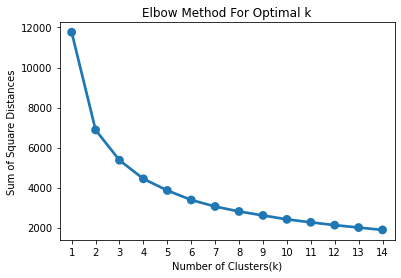

In [113]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [114]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMScores['Cluster_K'] = KMean_clust.labels_
RFMScores.sample(5)

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
15554.0       277.0       14.0     168.0  4  4  4      444        12   
14004.0        43.0      171.0     436.0  2  1  1      211         4   
16743.0        29.0      190.0    1354.0  2  1  1      211         4   
14083.0         4.0      177.0     680.0  1  1  2      112         4   
17805.0        73.0       10.0     220.0  3  4  3      343        10   

           RFM_Loyalty_Level  Cluster_K  
CustomerID                               
15554.0                   L4          1  
14004.0                   L1          0  
16743.0                   L1          0  
14083.0                   L1          2  
17805.0                   L3          1

In [115]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(RFMScores, x='Recency', y='Frequency', size='Monetary',
                 color='Cluster_K',
                 labels={'Recency': 'Recency Score', 'Frequency': 'Frequency Score', 'Monetary': 'Monetary Score'},
                 title='RFM Scores Clustering')
fig.update_layout(title='Cluster', xaxis_title='Recency', yaxis_title='Frequency')
fig.update_traces(marker=dict(size=5))  

fig.show()


## Hierarchical Clustering

In [116]:
## Libraries
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree

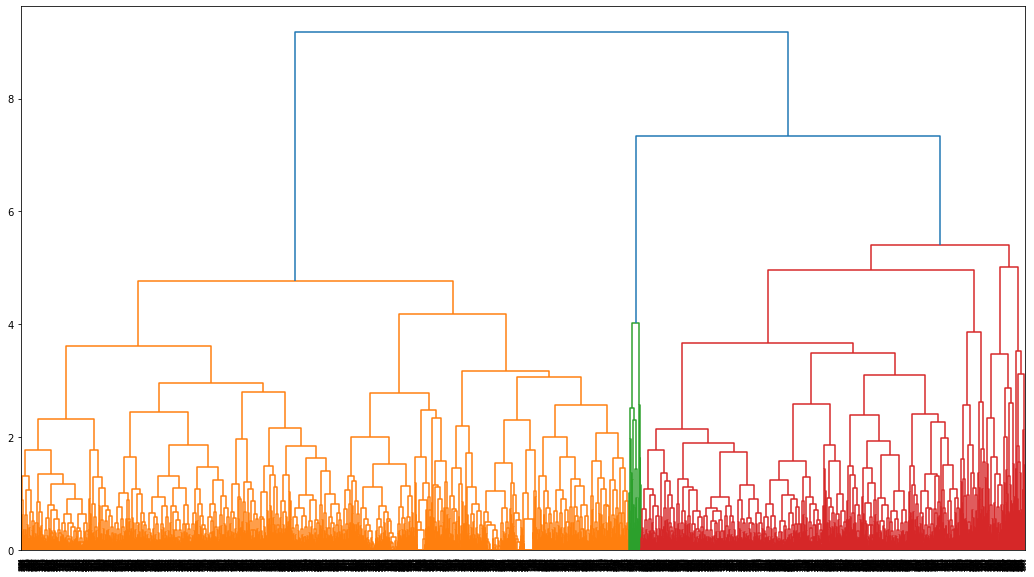

In [117]:
# Complete Linkage
plt.figure(figsize=(18,10))
mergings = linkage(Scaled_Data, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [118]:
# Clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, ..., 1, 1, 1])

In [119]:
# Assigning cluster labels
RFMScores['Cluster_H'] = cluster_labels
RFMScores.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0       325.0        1.0     436.0  4  4  1      441         9   
12747.0         2.0      103.0     436.0  1  1  1      111         3   
12748.0         1.0       40.0     436.0  1  1  1      111         3   
12749.0         3.0      199.0     436.0  1  1  1      111         3   
12820.0         3.0       59.0     576.0  1  2  2      122         5   

           RFM_Loyalty_Level  Cluster_K  Cluster_H  
CustomerID                                          
12346.0                   L3          1          0  
12747.0                   L1          2          1  
12748.0                   L1          2          1  
12749.0                   L1          2          1  
12820.0                   L1          2          1

In [120]:
fig = px.scatter(RFMScores, x='Recency', y='Frequency', size='Monetary',
                 color='Cluster_H',
                 labels={'Recency': 'Recency Score', 'Frequency': 'Frequency Score', 'Monetary': 'Monetary Score'},
                 title='RFM Scores Clustering')
fig.update_layout(title='Cluster', xaxis_title='Recency', yaxis_title='Frequency')
fig.update_traces(marker=dict(size=5))  

fig.show()

# **Summary**

In this project, the objective was to perform customer segmentation for an online retail business After performing EDA and cleaning, the data was first analyzed using the RFM (Recency, Frequency, Monetary) method to extract key features. Then, two clustering algorithms were employed - K-means clustering and Hierarchical clustering - to segment customers based on their purchasing behavior. The Elbow method was used to determine the optimal number of clusters for K-means, and both algorithms resulted in 3 clusters. The insights gained from the clustering analysis can be used to identify different customer segments and develop targeted marketing strategies for each segment.

# **Conclusion**

In conclusion, the project on "Online Retail Customer Segmentation" demonstrated the effectiveness of using RFM analysis and clustering techniques to segment customers based on their purchasing behavior. RFM analysis, with its minimum set of variables, proved to be a powerful tool in homogenizing customer groups. By defining a scoring system, we were able to achieve even better results than using raw RFM values. The RFM scoring system was then used as input to the K-means clustering algorithm to further segment customers into clusters with similar behavior.
Additionally, hierarchical clustering was used to validate the results obtained from the K-means algorithm. Both clustering techniques provided similar results, with three clusters being identified as optimal for our dataset. The RFM analysis and clustering results were then used to inform targeted marketing strategies and provide tailored recommendations for customers based on their interests and behavior.
It's important to note that RFM analysis is solely based on purchasing behavior and could benefit from the incorporation of customer demographics and product information. Incorporating weighted composite scoring could also provide a more comprehensive analysis of customer behavior. Overall, the project demonstrated the effectiveness of RFM analysis and clustering techniques in improving the efficiency and effectiveness of marketing plans, while increasing profitability at minimum cost.